# Neural Network Midterm
Seyed Mohammad Amin Dadgar <br>
student number: 4003624016


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from neurolab.trans import HardLim

# Question 2

## Part 1

In [2]:
################ Enter the question values: Points and Target outputs ################
Points = np.array([[1,4], [1,5], [2,4], [2,5], [3,1], [3,2], [4,1], [4,2]])
Targets = np.array([0, 0, 0, 0, 1, 1, 1, 1])

In [3]:
################ Initialize the weights and bias as a random number ################

## fix the seed
np.random.seed(5)
## initial weight
weight = np.random.randint(low=-3, high=3, size=2)

## coef array is made to make the bias negative or positive randomly
bias_coef_arr = [-1 ,1]
## create bias array to save the training history
bias = ( np.random.rand() * 10 ) * bias_coef_arr[np.random.randint(2)]

## transfer function
tr_func = HardLim()

In [4]:
weight

array([0, 2])

In [5]:


def single_neuron_perceptron_learning(initial_weight, initial_bias, Points, Targets, transfer_function, threshold=100):
    """
    single neuron learning with perceptron rule
    initial_weight and initial_bias is the initial parameters of the network
    Points and Targets are our dataset
    transfer_function is the transfer function or the activation function of the network
    threshold is set to 100 for default if the neron cannot learn the patter
    
    the output of this function is bias and weight change history
    """
    
    DATASET_LENGHT = len(Points)
    
    weights = [[initial_weight]]
    biases = [[initial_bias]]
    ## the learning loop
    ## learning_iteration is the threshold of learning
    learning_iteration = 0
    while learning_iteration < threshold:
        ## create a variable that checks in an iteration the weight or bias is changed
        ## reset the variable for each iteration
        change_of_W_b = False
        
        ## the weights and biases for each iteration will be saved in these two variables
        ## weights_iteration and biases_iteration 
        if learning_iteration == 0:
            weights_iteration = [initial_weight]
            biases_iteration = [initial_bias]
        else :  
            ## else get the last weight and bias as initial weight and initial bias of the iteration
            last_weights_index = len(weights[ learning_iteration- 1]) -1
            
            weights_iteration = [ weights[learning_iteration - 1][ last_weights_index ]]
            biases_iteration = [ biases[learning_iteration -1][ last_weights_index ]]
        
        ## apply the learning rule for each neuron
        for idx, p in enumerate(Points):
            actual_output = transfer_function(weights_iteration[idx].dot(p) + biases_iteration[idx])
            error = Targets[idx] - actual_output

            if error != 0:
                change_of_W_b = True
                
            weight_new = weights_iteration[idx] + error * p
            bias_new = biases_iteration[idx] + error

            weights_iteration.append(weight_new)
            biases_iteration.append(bias_new)
        
        ## if in the last iteration the weights and biase didn't change, 
        ## the neron has learned the pattern So break the learning loop
        if change_of_W_b == False:
            print("✅ The solution had been found!\nEnding the loop at iteration: %d" % learning_iteration)
            ## break the loop
            break
            
            
        ## save the last iteration data
        weights[learning_iteration].extend(weights_iteration)
        biases[learning_iteration].extend(biases_iteration)
        ## increase the learning iteration count 
        learning_iteration +=1
        
        if learning_iteration == threshold:
            history_dict = {
                "biases": biases,
                "weights": weights,
                "final_weight": np.NaN,
                "final_bias": np.NaN
            }
        else :
            ## get the final bias
            last_weigh_index = len(weights[learning_iteration - 1]) - 1
            final_weight = weights[learning_iteration - 1][last_weigh_index]
            final_bias = biases[learning_iteration - 1][last_weigh_index]
            history_dict = {"biases": biases,
                   "weights": weights,
                   "final_weight": final_weight,
                    "final_bias": final_bias}


    
    return history_dict

In [6]:
history = single_neuron_perceptron_learning(weight, bias, Points, Targets, tr_func)

✅ The solution had been found!
Ending the loop at iteration: 1


In [7]:
print("Final Weight: ",history["final_weight"])
print("Final Bias: ",history["final_bias"])

Final Weight:  [ 2. -1.]
Final Bias:  -2.067191553394264


## we will plot the data the the weight vector and the decision boundary line
$$ 
\begin{equation} 
    slopeFunction = \frac{y_1 - y_2}{x_1 - x_2} 
\end{equation}
$$
decision boundary is orthogonal to the weights slope <br>
$$
\begin{equation}
    decisionBoundarySlope = - \frac{1}{weightsSlope}
\end{equation}
$$

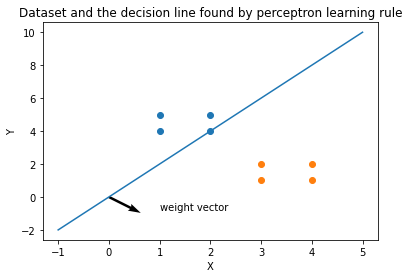

In [8]:
## the first 4 points are for class 1
## the second 4 points are for calss 2 
plt.scatter(Points[:4,0], Points[:4,1])
plt.scatter(Points[4:,0], Points[4:,1])

plt.quiver(0 ,0, history["final_weight"][0], history["final_weight"][1], scale=21  )

decision_x = np.linspace(-1 , 5, 50)

slope_weight = (0 - history["final_weight"][1]) / (0 - history["final_weight"][0])

slope_decision_boundary = -1 / slope_weight
decision_y = decision_x * slope_decision_boundary

plt.plot(decision_x, decision_y)
plt.title("Dataset and the decision line found by perceptron learning rule")
plt.xlabel("X")
plt.ylabel("Y")
plt.text(1 , -0.8 ,"weight vector")
plt.show()

## Part 2: Test the network 

In [16]:

weight = history["final_weight"]
bias = history["final_bias"]


## Our transfer function was created in part a, so we would like to re-use it
actual_output = tr_func(Points.dot(weight) + bias)

In [18]:
## check the outputs to the network!
actual_output == Targets

array([ True,  True,  True,  True,  True,  True,  True,  True])

**As we can see all the actual outputs were the same as target outputs**

In [19]:
2*50 + 12 * 22 + 12*22 - 2 * 22*22 - 360 -200

-900